# Table of content
1. Importing libraries and data
2.  Question  1
3.  Question  2
4.  Question  3
5.  Question  4
6.  Question  5
7.  Question  6
8.  Question  7
9.  Question  8
10. Question  9
11. Question 10

# 1. Importing libraries and data

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Original Data (Path)

path = r'/Users/ladyarmanoid/Documents/Data Analytics/CareerFoundry/Course/2- Data Immersion/Achievement 4/Instacart Basket Analysis/'

# Import 'final_merge'

df_final_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_merge.pkl'))

In [3]:
df_final_merge.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,region,activity_flag,department,age_group,income_group,dependants_group,profile_1,profile_2
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants


In [4]:
# Dropping columns no longer necessary for the analysis

df_final_merge = df_final_merge.drop(columns = ['aisle_id', 'add_to_cart_order', 'department_id', 'reordered'])

In [5]:
# Check dataframe output

df_final_merge.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,prices,price_range_loc,...,fam_status,income,region,activity_flag,department,age_group,income_group,dependants_group,profile_1,profile_2
0,2539329,1,1,2,8,NaN,196,Soda,9.0,Mid-range product,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
1,2398795,1,2,3,7,15.0,196,Soda,9.0,Mid-range product,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
2,473747,1,3,3,12,21.0,196,Soda,9.0,Mid-range product,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
3,2254736,1,4,4,7,29.0,196,Soda,9.0,Mid-range product,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
4,431534,1,5,4,15,28.0,196,Soda,9.0,Mid-range product,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants


In [6]:
df_final_merge

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,prices,price_range_loc,...,fam_status,income,region,activity_flag,department,age_group,income_group,dependants_group,profile_1,profile_2
0,2539329,1,1,2,8,NaN,196,Soda,9.0,Mid-range product,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
1,2398795,1,2,3,7,15.0,196,Soda,9.0,Mid-range product,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
2,473747,1,3,3,12,21.0,196,Soda,9.0,Mid-range product,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
3,2254736,1,4,4,7,29.0,196,Soda,9.0,Mid-range product,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
4,431534,1,5,4,15,28.0,196,Soda,9.0,Mid-range product,...,married,40423,South,normal_activity,beverages,30-44 years old,lower income,has dependants,married adult with dependants,low income married adult with dependants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,525976,58201,24,6,16,3.0,5161,Dried Mango,6.1,Mid-range product,...,married,138066,South,normal_activity,bulk,60-81 years old,high income,has dependants,married older adult with dependants,high income married older adult with dependants
30964560,758290,58201,26,0,12,9.0,5161,Dried Mango,6.1,Mid-range product,...,married,138066,South,normal_activity,bulk,60-81 years old,high income,has dependants,married older adult with dependants,high income married older adult with dependants
30964561,460711,58201,27,6,9,13.0,5161,Dried Mango,6.1,Mid-range product,...,married,138066,South,normal_activity,bulk,60-81 years old,high income,has dependants,married older adult with dependants,high income married older adult with dependants
30964562,1605789,58201,28,5,7,27.0,5161,Dried Mango,6.1,Mid-range product,...,married,138066,South,normal_activity,bulk,60-81 years old,high income,has dependants,married older adult with dependants,high income married older adult with dependants


In [7]:
# Check Frequency Flags values

df_final_merge['frequency_flag'].value_counts(dropna = False)

frequency_flag
frequent_customer        21204476
regular_customer          6865113
non_frequent_customer     2894975
Name: count, dtype: int64

### The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

# 2. Question 1

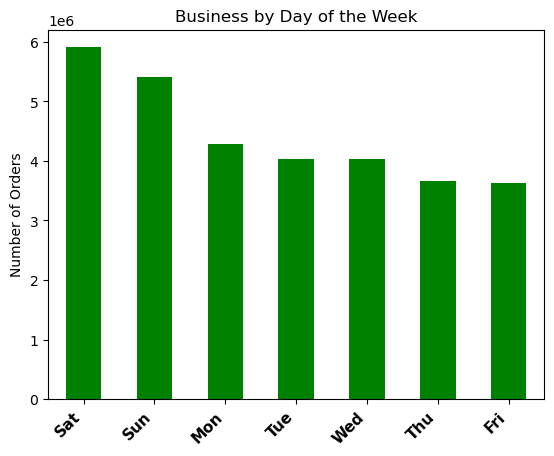

In [9]:
# Creating a bar graph for business by day of the week

business_dow = df_final_merge['orders_day_of_week'].value_counts().plot.bar(color = 'green')

bars = ('Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri')
y_pos = np.arange(len(bars))

# Use the plt.xticks function to custom labels

plt.xticks(y_pos, bars, color = 'black', rotation = 45, fontweight='bold', fontsize = '11', horizontalalignment='right')

# Title and labels

plt.title('Business by Day of the Week')
plt.xlabel('')
plt.ylabel('Number of Orders')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/business_dow.png'))

# Show the graph

plt.show()

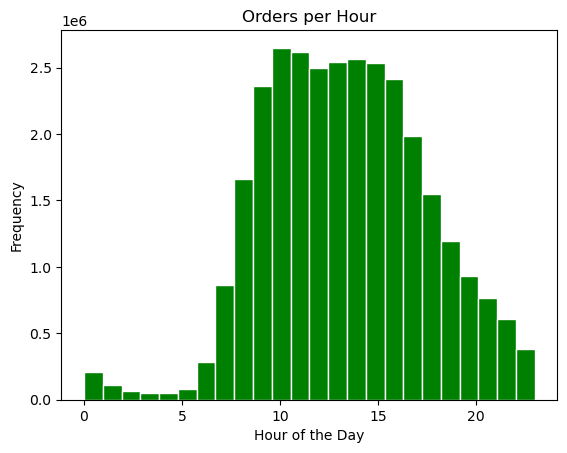

In [10]:
# Creating a bar graph for business by day of the week

orders_hod = df_final_merge['order_hour_of_day'].plot.hist(bins = 24, edgecolor='white', color = ['green'])

# Title and labels

plt.title('Orders per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/orders_hod.png'))

# Show the graph

plt.show()

# 3. Question 2

/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


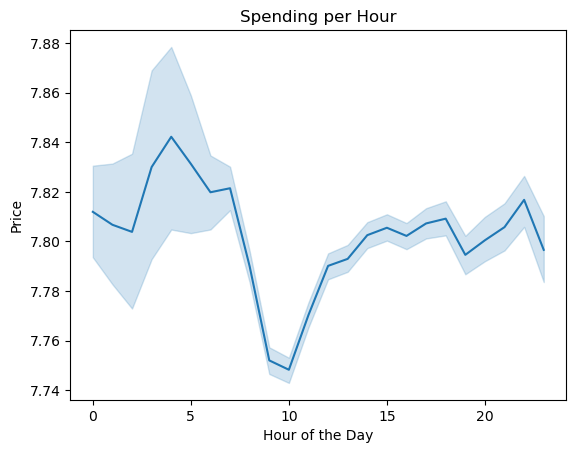

In [11]:
# Create a line graph for 'spending per hour'

spending_per_hour = sns.lineplot(data = df_final_merge, x = 'order_hour_of_day',y = 'prices')

# Title and labels

plt.title('Spending per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Price')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/spending_per_hour.png'))

# Show the graph

plt.show()

# 4. Question 3

In [12]:
# Check 'df_final_merge' min values

df_final_merge['prices'].min()

1.0

In [13]:
# Check 'df_final_merge' avg. values

df_final_merge['prices'].mean()

7.7905974

In [14]:
# Check 'df_final_merge' max values

df_final_merge['prices'].max()

25.0

In [15]:
df_final_merge['prices'].isnull().sum()

4877

In [16]:
df_final_merge.isnull().sum()

order_id                        0
user_id                         0
number_of_orders                0
orders_day_of_week              0
order_hour_of_day               0
days_since_prior_order    1661283
product_id                      0
product_name                    0
prices                       4877
price_range_loc                 0
busiest_day                     0
busiest_days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
average_spend                   0
spender_flag                    0
customer_frequency              0
frequency_flag                  0
gender                          0
state                           0
age                             0
dependants                      0
fam_status                      0
income                          0
region                          0
activity_flag                   0
department                      0
age_group                       0
income_group  

In [17]:
# Create a dataframe for the missing values in 'prices'

df_nan = df_final_merge[df_final_merge['prices'].isnull() == True]

# Check output

df_nan

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,prices,price_range_loc,...,fam_status,income,region,activity_flag,department,age_group,income_group,dependants_group,profile_1,profile_2
2572978,1435153,1519,26,2,11,6.0,21553,Lowfat 2% Milkfat Cottage Cheese,NaN,High-range product,...,divorced/widowed,177864,Northeast,normal_activity,dairy eggs,60-81 years old,high income,no dependants,single older adult w/o dependants,high income single older adult w/o dependants
2572979,1066435,1519,32,3,10,5.0,21553,Lowfat 2% Milkfat Cottage Cheese,NaN,High-range product,...,divorced/widowed,177864,Northeast,normal_activity,dairy eggs,60-81 years old,high income,no dependants,single older adult w/o dependants,high income single older adult w/o dependants
2574033,1697208,2409,33,1,19,5.0,21553,Lowfat 2% Milkfat Cottage Cheese,NaN,High-range product,...,married,230074,West,normal_activity,dairy eggs,45-59 years old,high income,has dependants,married adult with dependants,high income married adult with dependants
2574786,965345,3531,27,2,19,8.0,33664,2 % Reduced Fat Milk,NaN,High-range product,...,married,233776,West,normal_activity,dairy eggs,60-81 years old,high income,has dependants,married older adult with dependants,high income married older adult with dependants
2574791,2943740,3793,1,2,9,NaN,21553,Lowfat 2% Milkfat Cottage Cheese,NaN,High-range product,...,married,182933,South,normal_activity,dairy eggs,45-59 years old,high income,has dependants,married adult with dependants,high income married adult with dependants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7740245,3138833,51346,1,6,4,NaN,33664,2 % Reduced Fat Milk,NaN,High-range product,...,married,207497,Northeast,normal_activity,dairy eggs,45-59 years old,high income,has dependants,married adult with dependants,high income married adult with dependants
7740246,1275440,51346,3,2,7,11.0,33664,2 % Reduced Fat Milk,NaN,High-range product,...,married,207497,Northeast,normal_activity,dairy eggs,45-59 years old,high income,has dependants,married adult with dependants,high income married adult with dependants
7740247,3265389,51346,4,1,17,13.0,33664,2 % Reduced Fat Milk,NaN,High-range product,...,married,207497,Northeast,normal_activity,dairy eggs,45-59 years old,high income,has dependants,married adult with dependants,high income married adult with dependants
7740709,1179092,131671,12,4,9,15.0,33664,2 % Reduced Fat Milk,NaN,High-range product,...,single,86490,Northeast,normal_activity,dairy eggs,30-44 years old,middle income,no dependants,single adult w/o dependants,mid income single adult w/o dependants


In [18]:
df_nan['department']

2572978    dairy eggs
2572979    dairy eggs
2574033    dairy eggs
2574786    dairy eggs
2574791    dairy eggs
              ...    
7740245    dairy eggs
7740246    dairy eggs
7740247    dairy eggs
7740709    dairy eggs
7740961    dairy eggs
Name: department, Length: 4877, dtype: object

In [19]:
df_final_merge.describe()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,prices,max_order,average_spend,customer_frequency,age,dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.710317e+06,1.029284e+05,1.783414e+01,2.741397e+00,1.341098e+01,1.081032e+01,2.559850e+04,7.790597e+00,3.442569e+01,7.790589e+00,9.957144e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,9.873785e+05,5.947061e+04,1.763442e+01,2.089254e+00,4.248845e+00,8.200519e+00,1.408096e+04,4.109850e+00,2.489504e+01,8.596487e-01,6.508999e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,4.200000e+00,1.400000e+01,7.385130e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.710404e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,7.400000e+00,2.800000e+01,7.812245e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565206e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.130000e+01,4.800000e+01,8.224106e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,2.500000e+01,9.900000e+01,2.011429e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


### Impute the mean value price to the 'dairy eggs' department

In [20]:
# Calculate the mean of the 'prices' column

mean = df_final_merge['prices'].mean()

# Fill NaN values with the mean of 'prices' column

df_final_merge.fillna(mean, inplace = True)

In [21]:
print(df_final_merge)

          order_id  user_id  number_of_orders  orders_day_of_week  \
0          2539329        1                 1                   2   
1          2398795        1                 2                   3   
2           473747        1                 3                   3   
3          2254736        1                 4                   4   
4           431534        1                 5                   4   
...            ...      ...               ...                 ...   
30964559    525976    58201                24                   6   
30964560    758290    58201                26                   0   
30964561    460711    58201                27                   6   
30964562   1605789    58201                28                   5   
30964563   1565024   152886                 2                   1   

          order_hour_of_day  days_since_prior_order  product_id product_name  \
0                         8                7.790597         196         Soda   
1          

In [22]:
# Create a 'price_range' column

df_final_merge.loc[df_final_merge['prices'] >= 15, 'price_range'] = 'high price item'

df_final_merge.loc[(df_final_merge['prices'] <= 15) & (df_final_merge['prices'] >= 5), 'price_range'] = 'mid price item'

df_final_merge.loc[df_final_merge['prices'] <= 5, 'price_range'] = 'low price item'

# Check output

df_final_merge['price_range'].value_counts(dropna = False)

price_range
mid price item     20896648
low price item      9674840
high price item      393076
Name: count, dtype: int64

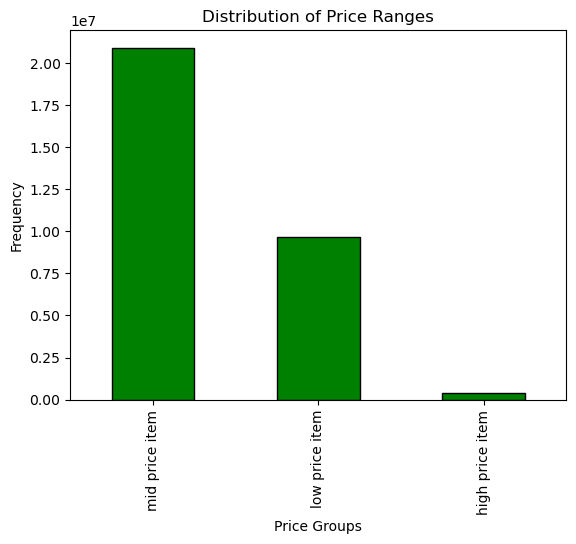

In [23]:
# Creating a bar graph for business by day of the week

price_range_grp = df_final_merge['price_range'].value_counts().plot.bar(color = 'green', edgecolor = 'black')

# Title and labels

plt.title('Distribution of Price Ranges')
plt.xlabel('Price Groups')
plt.ylabel('Frequency')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/price_range_grp.png'))

# Show the graph

plt.show()

# 5. Question 4

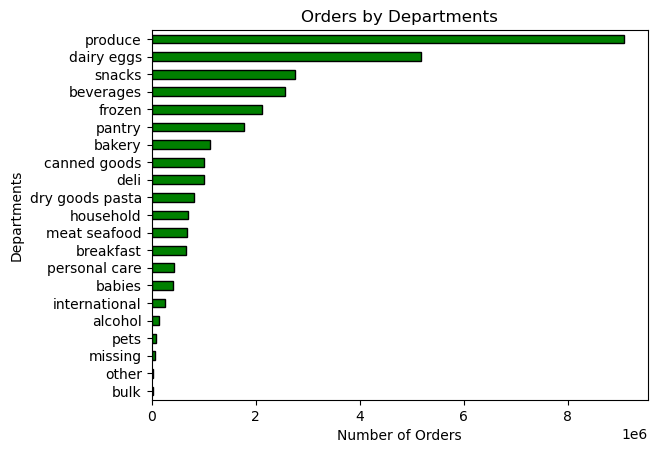

In [24]:
# Creating a bar graph for 'departments_frequency'

departments_frequency = df_final_merge['department'].value_counts().sort_values(ascending = True).plot.barh(color='green', edgecolor='black')

# Title and labels

plt.title('Orders by Departments')
plt.xlabel('Number of Orders')
plt.ylabel('Departments')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/departments_frequency.png'))

# Show the graph

plt.show()

### Top 10 Produce Items

In [25]:
# Create 'df_popular_products'

df_top_produce_products = df_final_merge.loc[df_final_merge['department'].isin(['produce'])]

# Check output

df_top_produce_products.shape

(9079273, 34)

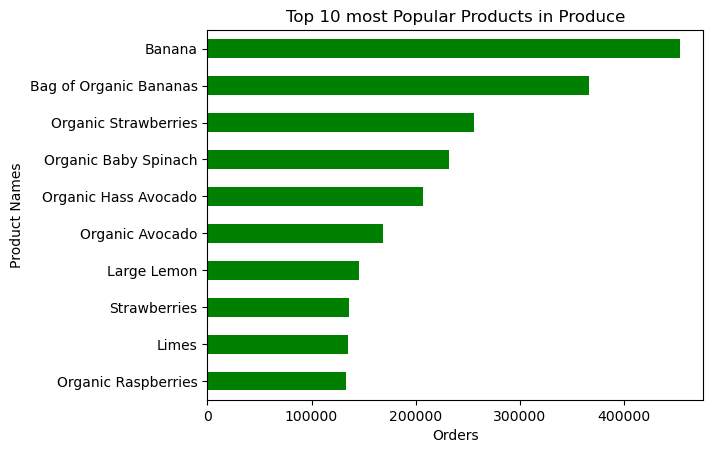

In [27]:
# Createg barchart for top 10 most popular products in Produce

popular_products_barchart = df_top_produce_products['product_name'].value_counts()[:10].sort_values(ascending = True).plot.barh(title='Top 10 most Popular Products in Produce', ylabel='Product Names', xlabel='Orders', color='green')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/popular_products_barchart.png'))

# Show the graph

plt.show()

# 6. Question 5

In [33]:
# Check output for 'loyalty_flag'

df_final_merge['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

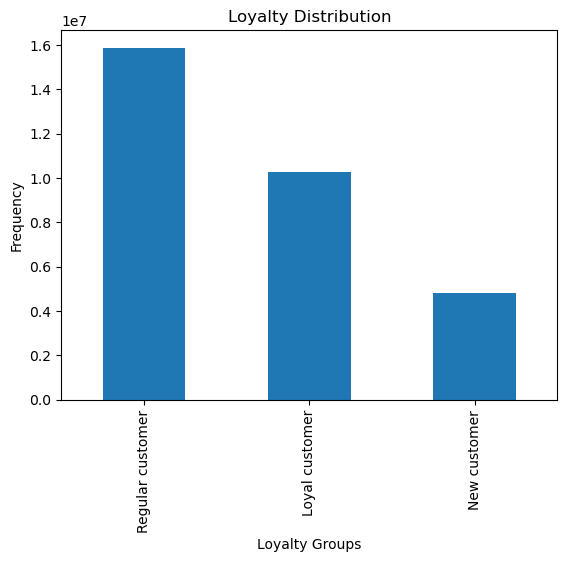

In [34]:
# Creating a bar graph for business by day of the week

loyalty_distribution = df_final_merge['loyalty_flag'].value_counts().plot.bar()

# Title and labels

plt.title('Loyalty Distribution')
plt.xlabel('Loyalty Groups')
plt.ylabel('Frequency')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/loyalty_distribution.png'))

# Show the graph

plt.show()

# 7. Question 6

In [35]:
# Check output for 'frequency_flag'

df_final_merge['frequency_flag'].value_counts(dropna = False)

frequency_flag
frequent_customer        21204476
regular_customer          6865113
non_frequent_customer     2894975
Name: count, dtype: int64

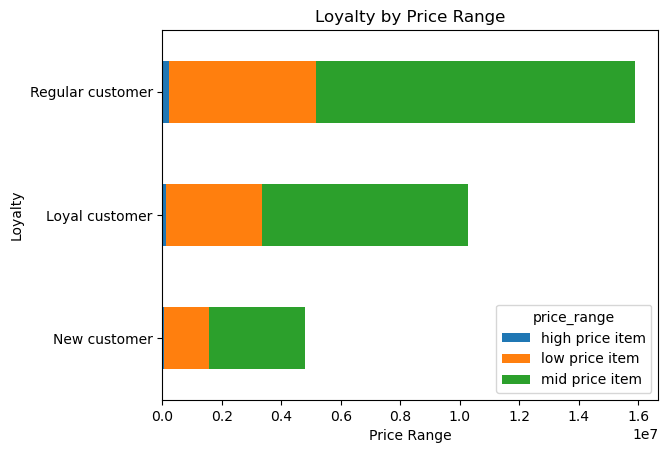

In [36]:
# Group by customer 'loyalty_flag' and 'frequency_flag'

loyalty_price_range = df_final_merge.groupby(['loyalty_flag', 'price_range']).size().unstack()

# Sort

loyalty_price_range = loyalty_price_range.loc[loyalty_price_range.sum(axis = 1).sort_values(ascending = True).index]

# Create bar chart

loyalty_price_range_bar = loyalty_price_range.plot.barh(stacked = True)

# Title and labels

plt.title('Loyalty by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Loyalty')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/loyalty_price_range.png'))

# Show the graph

plt.show()

# 8. Question 7

In [37]:
# Check output for the 'region' column

df_final_merge['region'].value_counts(dropna = False)

region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

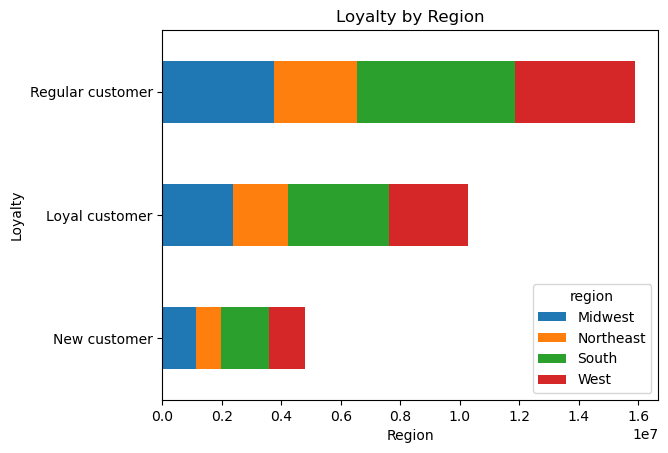

In [38]:
# Group by customer 'loyalty_flag' and 'region'

loyalty_region = df_final_merge.groupby(['loyalty_flag', 'region']).size().unstack()

loyalty_region = loyalty_region.loc[loyalty_region.sum(axis = 1).sort_values(ascending = True).index]

# Create bar chart

loyalty_region_bar = loyalty_region.plot.barh(stacked = True)

# Title and labels

plt.title('Loyalty by Region')
plt.xlabel('Region')
plt.ylabel('Loyalty')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/loyalty_region.png'))

# Show the graph

plt.show()

In [39]:
# Check output

loyalty_region

region,Midwest,Northeast,South,West
loyalty_flag,,,,
New customer,1136761,842156,1593664,1231114
Loyal customer,2373774,1841785,3405844,2662690
Regular customer,3750978,2780744,5311631,4033423


In [40]:
# Group by customer 'department' and 'age_group'

department_age_group = df_final_merge.groupby(['department', 'age_group']).size().unstack()

department_age_group = department_age_group.loc[department_age_group.sum(axis = 1).sort_values(ascending = True).index]

# Check output

department_age_group

age_group,18-29 years old,30-44 years old,45-59 years old,60-81 years old
department,,,,
bulk,6414,7794,7819,11424
other,6856,7798,8153,11604
missing,12569,14944,15468,21787
pets,18163,21489,21653,31755
alcohol,27938,33417,35676,47596
international,48830,60219,60494,86448
babies,77758,96520,97376,138738
personal care,79540,98978,102060,143728
breakfast,128115,156165,158819,227751


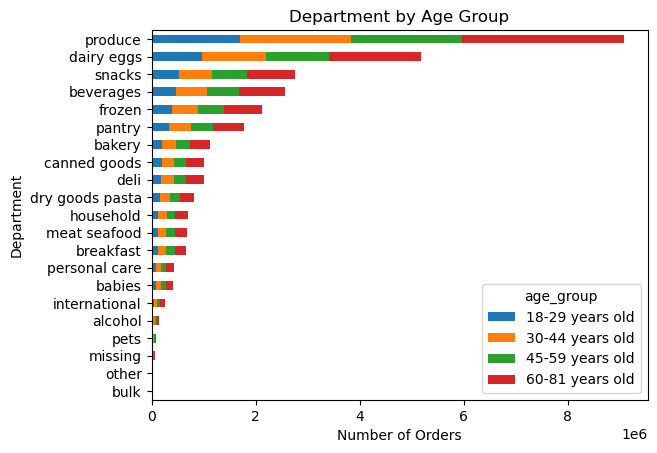

In [41]:
# Create bar chart for 'department_age_group'

department_age_group_bar = department_age_group.plot.barh(stacked = True)

# Title and labels

plt.title('Department by Age Group')
plt.xlabel('Number of Orders')
plt.ylabel('Department')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/department_age_group_bar.png'))

# Show the graph

plt.show()

In [42]:
# Group by customer 'department' and 'fam_status'

department_fam_status = df_final_merge.groupby(['department', 'fam_status']).size().unstack()

department_fam_status = department_fam_status.loc[department_fam_status.sum(axis = 1).sort_values(ascending= True ).index]

# Check output

department_fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
bulk,2676,1633,23818,5324
other,2842,1815,23882,5872
missing,5064,3317,45516,10871
pets,8025,5338,64120,15577
alcohol,11859,8379,99421,24968
international,21814,12394,179136,42647
babies,34351,19381,287683,68977
personal care,36313,20201,297900,69892
breakfast,56590,33198,471220,109842


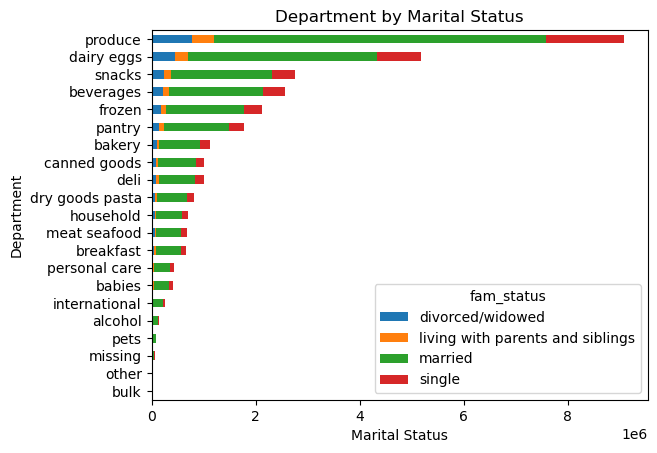

In [43]:
# Create bar chart

department_fam_status_bar = department_fam_status.plot.barh(stacked = True)

# Title and labels

plt.title('Department by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Department')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/department_fam_status_bar.png'))

# Show the graph

plt.show()

# 10. Question 9

In [44]:
# Group by customer 'income_group' and 'departments'

income_group_department = df_final_merge.groupby(['department','income_group']).size().unstack()

# Sort

income_group_department = income_group_department.loc[income_group_department.sum(axis = 1).sort_values(ascending = True).index]

# Check output

income_group_department

income_group,high income,lower income,middle income
department,,,
bulk,14218,4676,14557
other,15750,3886,14775
missing,29455,6547,28766
pets,45089,8612,39359
alcohol,69142,18047,57438
international,119991,21636,114364
babies,196704,29240,184448
personal care,193412,47782,183112
breakfast,297596,91408,281846


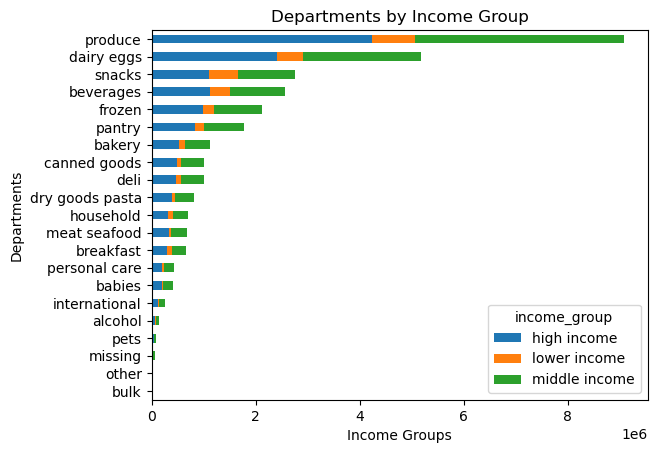

In [45]:
# Create bar chart 'income_group_department_bar'

income_group_department_bar = income_group_department.plot.barh(stacked = True, title = 'Departments by Income Group')

# Title and labels

plt.xlabel('Income Groups')
plt.ylabel('Departments')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/income_group_department_bar.png'))

# Show the graph

plt.show()

In [46]:
# Group by customer 'profile' and 'departments'

profile_department = df_final_merge.groupby(['department','profile_1']).size().unstack()

# Sort

profile_department = profile_department.loc[profile_department.sum(axis = 1).sort_values(ascending = True).index]

# Check output

profile_department

profile_1,married adult with dependants,married older adult with dependants,married young adult with dependants,single adult w/o dependants,single older adult w/o dependants,single young adult w/o dependants,single young adult with dependants
department,,,,,,,
bulk,11795,8748,3275,3818,2676,1506,1633
other,11729,8762,3391,4222,2842,1650,1815
missing,22725,16723,6068,7687,5064,3184,3317
pets,32055,23730,8335,11087,8025,4490,5338
alcohol,50528,35737,13156,18565,11859,6403,8379
international,90472,64634,24030,30241,21814,12406,12394
babies,145364,104387,37932,48532,34351,20445,19381
personal care,151213,107415,39272,49825,36313,20067,20201
breakfast,236453,171161,63606,78531,56590,31311,33198


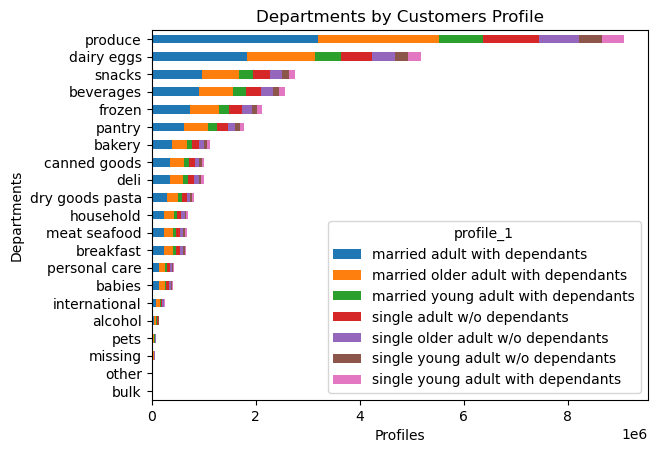

In [47]:
# Create bar chart for 'profile_department_bar'

profile_department_bar = profile_department.plot.barh(stacked = True, title ='Departments by Customers Profile')

# Labels

plt.xlabel('Profiles')
plt.ylabel('Departments')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/profile_department_bar.png'))

# Show the graph

plt.show()

# 11. Question 10

In [48]:
# Group by customer 'profile_1' and 'region'

customers_profile_region = df_final_merge.groupby(['profile_1','region']).size().unstack()

# Sort

customers_profile_region = customers_profile_region.loc[customers_profile_region.sum(axis = 1).sort_values(ascending = True).index]

# Check output

customers_profile_region

region,Midwest,Northeast,South,West
profile_1,,,,
single young adult w/o dependants,329742,264501,494339,359036
single young adult with dependants,351435,256430,505457,367850
single older adult w/o dependants,617198,478767,877314,671992
married young adult with dependants,674661,503053,960855,750244
single adult w/o dependants,875876,611214,1210280,949422
married older adult with dependants,1838245,1405462,2644107,2041419
married adult with dependants,2574356,1945258,3618787,2787264


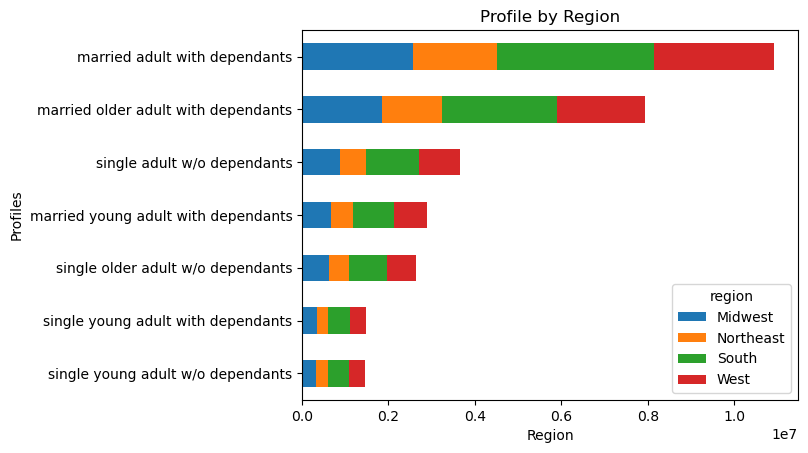

In [49]:
# Create bar chart

customers_profile_region_bar = customers_profile_region.plot.barh(stacked = True, title ='Profile by Region')

# Labels

plt.ylabel('Profiles')
plt.xlabel('Region')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/customers_profile_region_bar.png'))

# Show the graph

plt.show()

In [50]:
# Group by customer 'profile' and 'income_group'

profile_income_group = df_final_merge.groupby(['profile_1','income_group']).size().unstack()

# Sort

profile_income_group = profile_income_group.loc[profile_income_group.sum(axis = 1).sort_values(ascending = True).index]

# Check output

profile_income_group

income_group,high income,lower income,middle income
profile_1,,,
single young adult w/o dependants,48890,237953,1160775
single young adult with dependants,47548,220542,1213082
single older adult w/o dependants,1846202,210710,588359
married young adult with dependants,88782,440912,2359119
single adult w/o dependants,1673864,398257,1574671
married older adult with dependants,5549516,662250,1717467
married adult with dependants,4952600,1191930,4781135


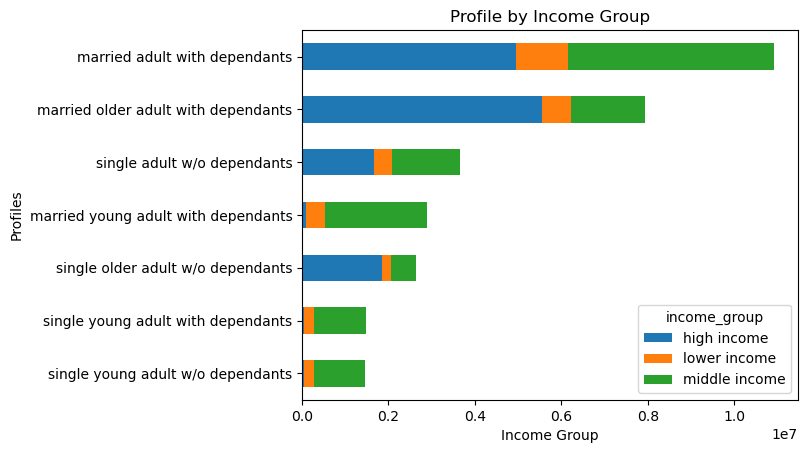

In [51]:
# Create bar chart

profile_income_group_bar = profile_income_group.plot.barh(stacked = True, title = 'Profile by Income Group')

# Labels

plt.ylabel('Profiles')
plt.xlabel('Income Group')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/profile_income_group_bar.png'))

# Show the graph

plt.show()

In [52]:
# Group by customer 'profile_2' and 'frequency_flag'

profile_frequency_flag = df_final_merge.groupby(['profile_2','frequency_flag']).size().unstack()

# Sort 

profile_frequency_flag = profile_frequency_flag.loc[profile_frequency_flag.sum(axis = 1).sort_values(ascending = True).index]

# Check output

profile_frequency_flag

frequency_flag,frequent_customer,non_frequent_customer,regular_customer
profile_2,,,
high income single young adult with dependants,34374,4406,8768
high income single young adult w/o dependants,35791,3361,9738
high income married young adult with dependants,61058,7711,20013
low income single older adult w/o dependants,137473,22549,50688
low income single young adult with dependants,146254,24500,49788
low income single young adult w/o dependants,153076,26176,58701
low income single adult w/o dependants,259967,43070,95220
low income married young adult with dependants,292833,48894,99185
mid income single older adult w/o dependants,408341,55138,124880


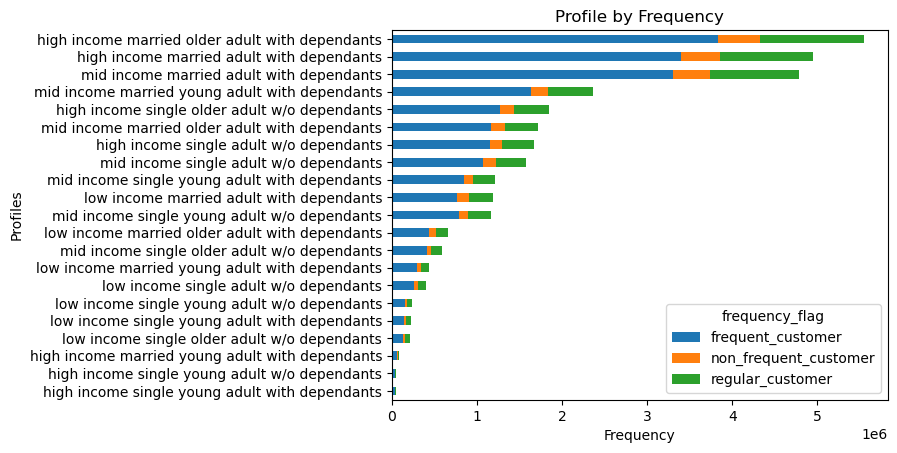

In [53]:
# Create bar chart 'profile_frequency_flag_bar'

profile_frequency_flag_bar = profile_frequency_flag.plot.barh(stacked = True, title = 'Profile by Frequency')

# Labels

plt.ylabel('Profiles')
plt.xlabel('Frequency')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/profile_frequency_flag_bar.png'))

# Show the graph

plt.show()

In [54]:
# Group by customer profile and price_range

profile_price_range = df_final_merge.groupby(['profile_2','price_range']).size().unstack()

# Sort 

profile_price_range = profile_price_range.loc[profile_price_range.sum(axis = 1).sort_values(ascending = True).index]

# Check output

profile_price_range

price_range,high price item,low price item,mid price item
profile_2,,,
high income single young adult with dependants,651,14057,32840
high income single young adult w/o dependants,701,14338,33851
high income married young adult with dependants,1045,26995,60742
low income single older adult w/o dependants,765,91011,118934
low income single young adult with dependants,1531,87131,131880
low income single young adult w/o dependants,1611,94166,142176
low income single adult w/o dependants,2075,164507,231675
low income married young adult with dependants,2931,174629,263352
mid income single older adult w/o dependants,7203,184868,396288


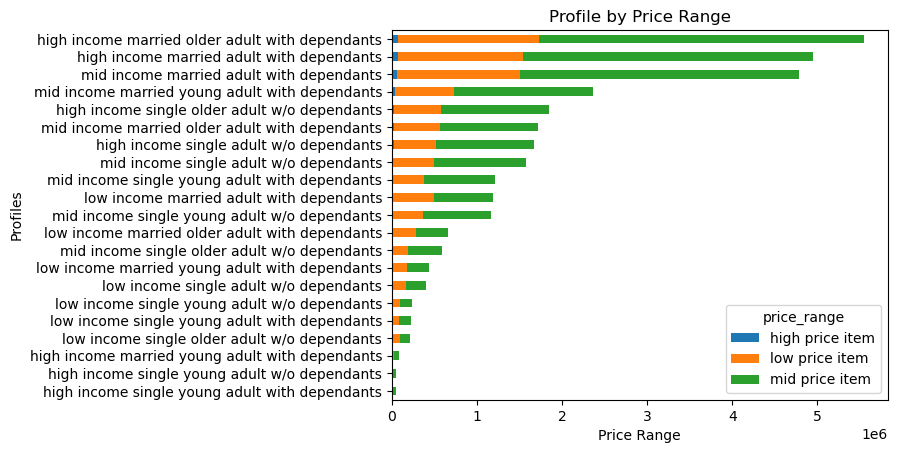

In [55]:
# Create bar chart 'profile_price_range_bar'

profile_price_range_bar = profile_price_range.plot.barh(stacked = True, title = 'Profile by Price Range')

# Labels

plt.ylabel('Profiles')
plt.xlabel('Price Range')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/profile_price_range_barm.png'))

# Show the graph

plt.show()